In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Data\car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
# Print Unique values of categorical features
print('Seller Type: {}'.format(df['Seller_Type'].unique()))

print('Transmission: {}'.format(df['Transmission'].unique()))

print('Owner: {}'.format(df['Owner'].unique()))

print('Fuel Type: {}'.format(df['Fuel_Type'].unique()))


Seller Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']
Owner: [0 1 3]
Fuel Type: ['Petrol' 'Diesel' 'CNG']


In [7]:
#Check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# When analyzing asset prices, you need to account for Yoy asset depreciation - we'll create a no.of years feature to account for this

# Use df.columns to get the column names easily
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

# note here that we didn't include car name as they are not useful indicators of a car's price

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# No. of years = Current year - year bought

# We set a current year into the df, note that it has to be an int
final_dataset['Current_Year'] = 2021

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [14]:
# Create no. of years feature column
final_dataset['no_year']=final_dataset['Current_Year'] - final_dataset['Year']

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [16]:
# Current year and year is no longer required

#inplace makes the drop permanent
final_dataset.drop(['Year'], axis=1,
inplace=True)

final_dataset.drop(['Current_Year'], axis=1, inplace=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [18]:
# Now we have to encode the categorical features
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [19]:
# All categorical data is encoded with values
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [20]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [22]:
!pip install seaborn

In [23]:
import seaborn as sns

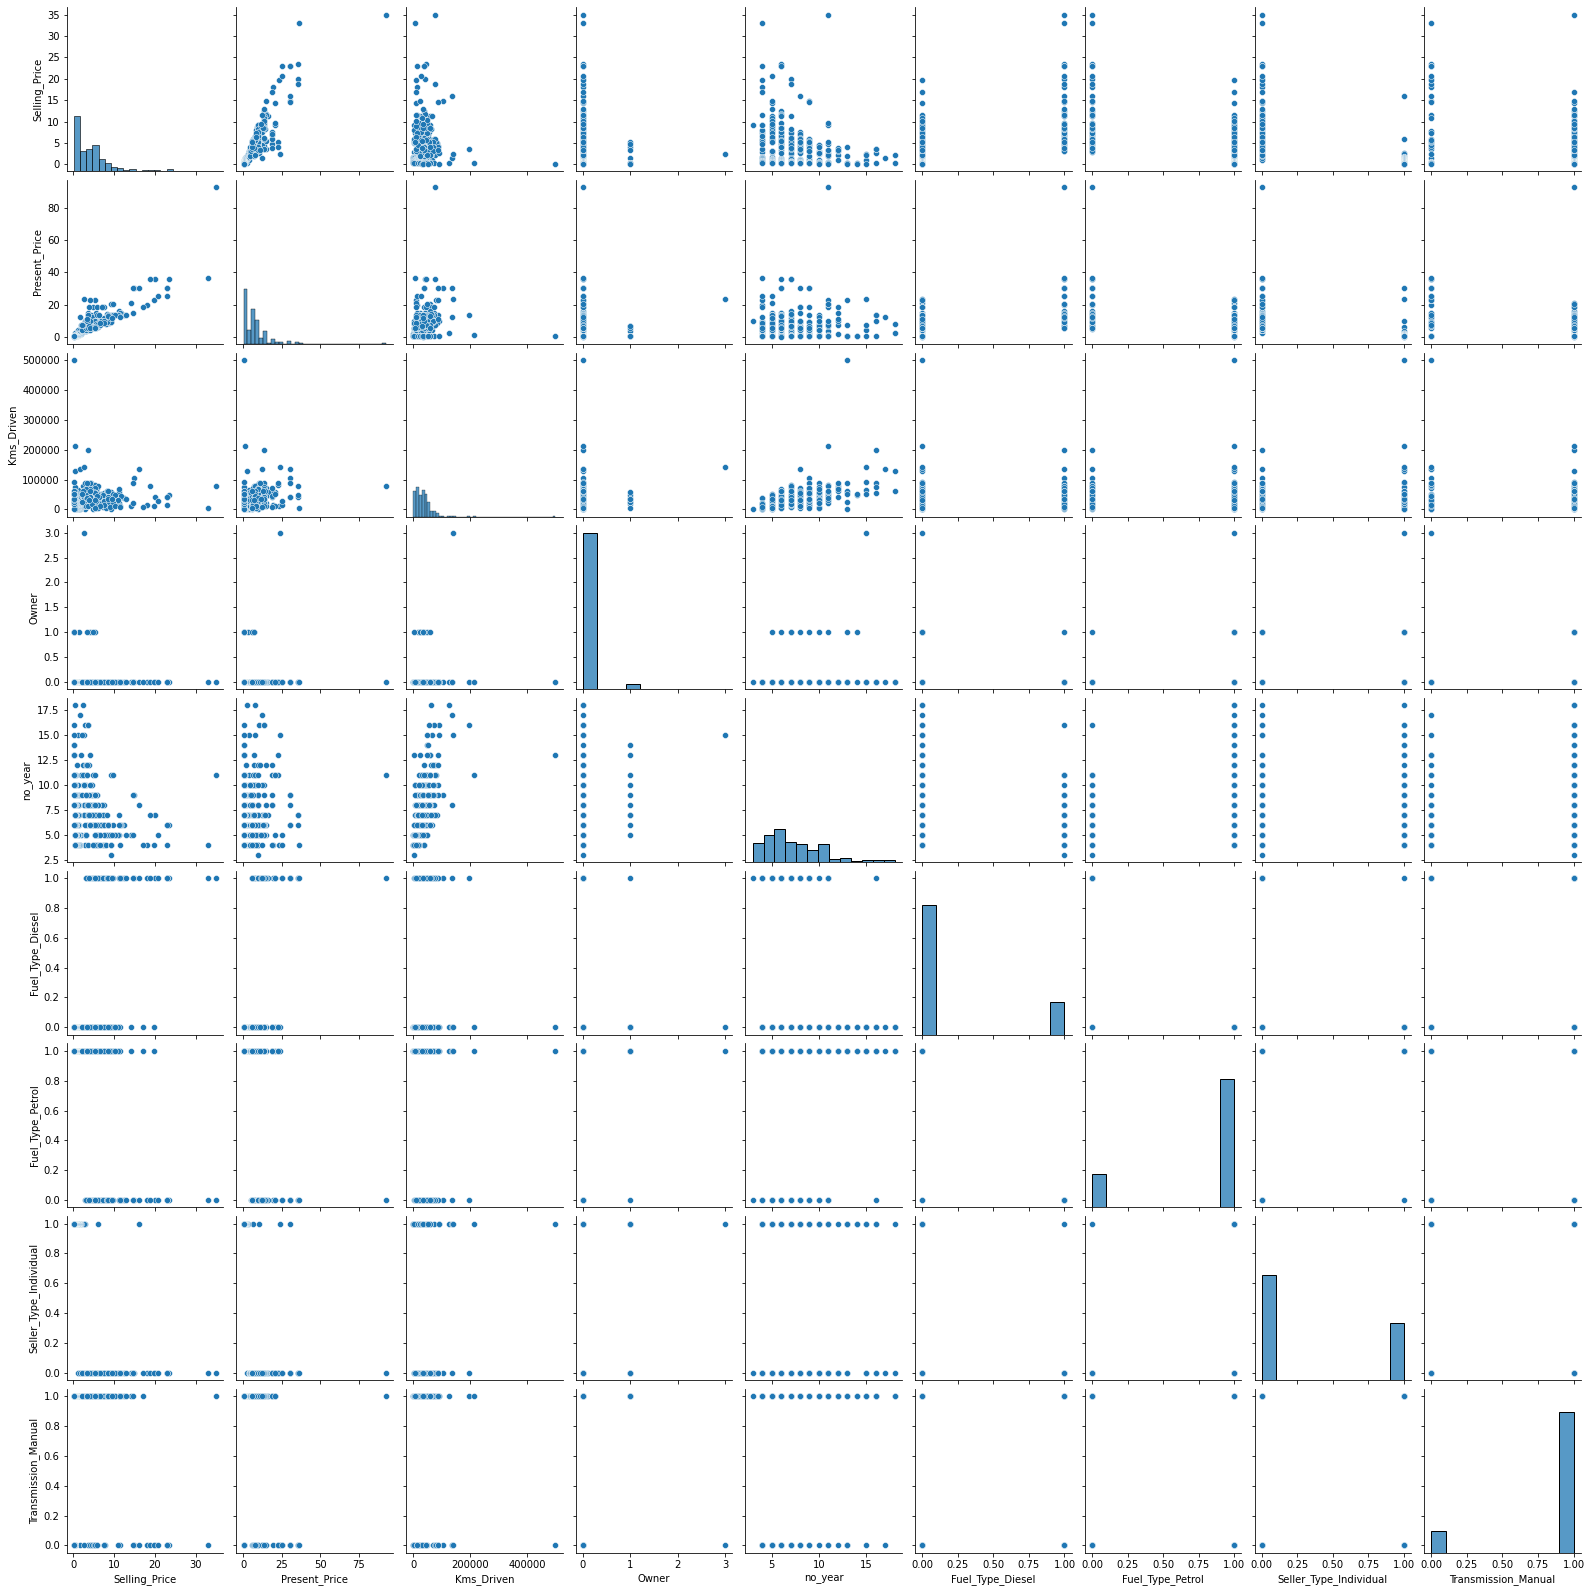

In [24]:
# We will visualize the correlation matric with seaborn
sns.pairplot(final_dataset)

In [26]:
import matplotlib.pyplot as plt

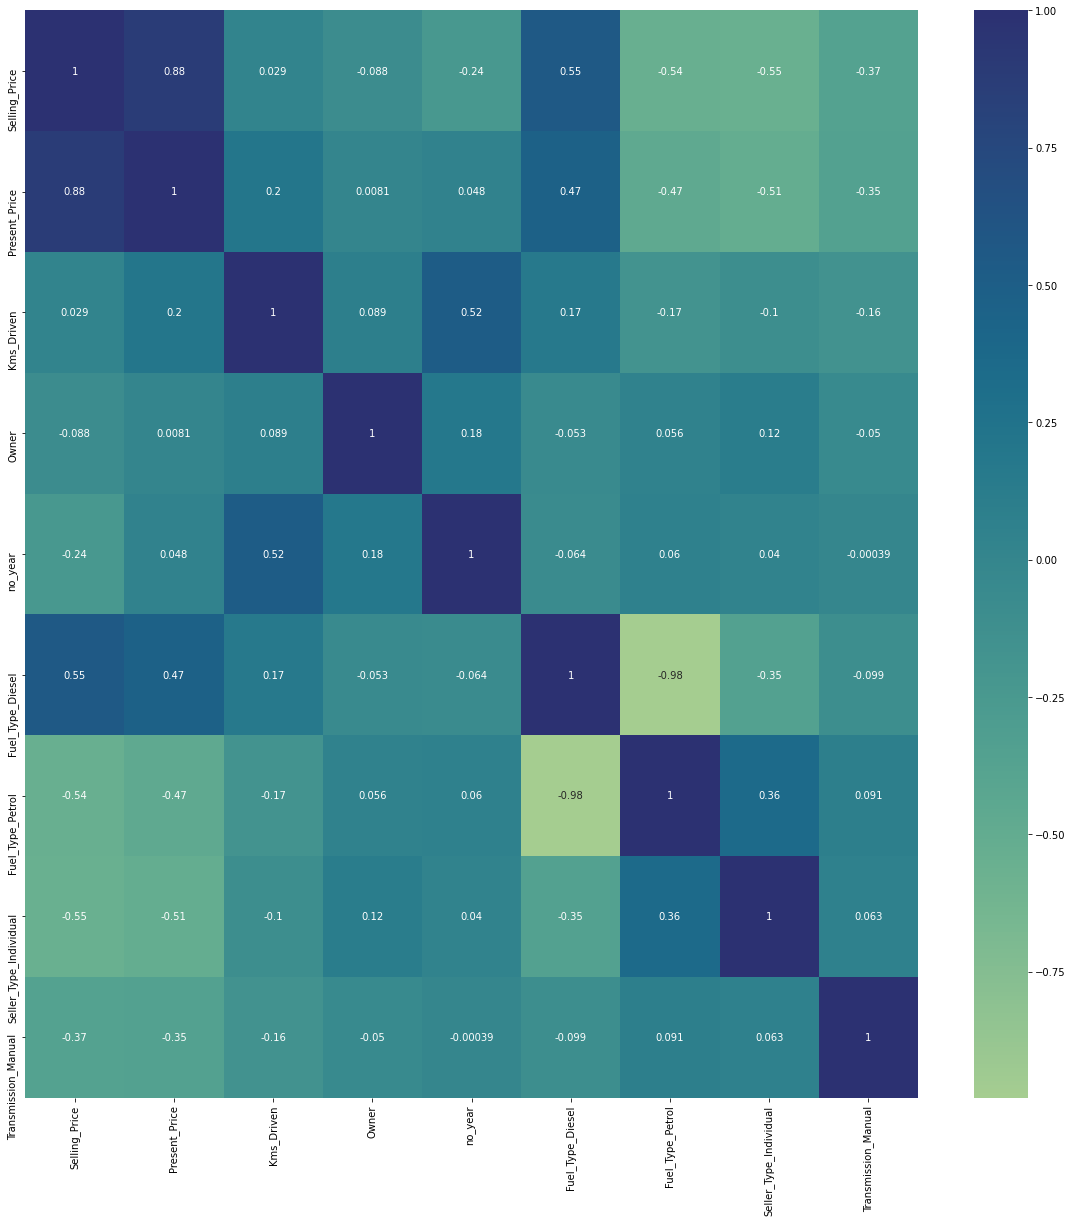

In [30]:
# Plot in form of heatmap
corrmat = final_dataset.corr()
top_corr_features = corrmat.index  # takes columns of our data
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='crest')
plt.show()

In [33]:
# Split training and testing data

# Independant features
X = final_dataset.iloc[:,1:]

# Dependant features
y = final_dataset.iloc[:,0]

#check with head() function to see what the features are

In [34]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=b40ab44da1842615cce9d15400959bde0e6a8a3b8d6153e020dc4b1748708f5d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [36]:
# Find out Important Features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [43]:
print(model.feature_importances_)

[0.3692371  0.04343119 0.0013167  0.07649459 0.22636547 0.01045992
 0.13593068 0.13676435]


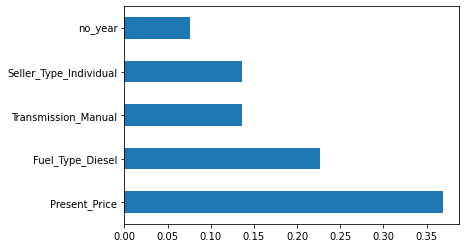

In [44]:
# Plot feature importance
feat_important = pd.Series(model.feature_importances_, index=X.columns)
feat_important.nlargest(5).plot(kind='barh')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
113,1.400,35000,0,5,0,1,1,1
175,0.787,75000,0,10,0,1,1,1
15,10.790,43000,0,5,1,0,0,1
290,6.400,19000,0,7,0,1,0,1
106,3.450,16500,1,7,0,1,1,1
...,...,...,...,...,...,...,...,...
289,13.600,10980,0,5,0,1,0,1
41,3.980,46706,0,7,0,1,0,1
119,1.900,5400,0,8,0,1,1,1
55,15.040,70000,0,12,0,1,0,0


In [48]:
import numpy as np

In [51]:
# Hyperparameter tuning with Randomized Search CV (it's faster than gridsearchCV)

# Number of trees in random forest
n_estimators = [int(n) for n in np.linspace(start=100, stop=1200, num=12)]
#print(n_estimators)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Max number of levels in tree
max_depth = [int(n) for n in np.linspace(start=5, stop=30, num=6)]

# Minimum number of samples to split a node
min_samples_split = [2, 5, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Create the random grid dictionary
random_grid = {'n_estimators': n_estimators, 
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
# We will use random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Create base model to tune
rf = RandomForestRegressor()

In [55]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions= random_grid, 
scoring='neg_mean_squared_error',
n_iter=10,
cv=5,
verbose=2,
random_state=42,
n_jobs=1)

In [56]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

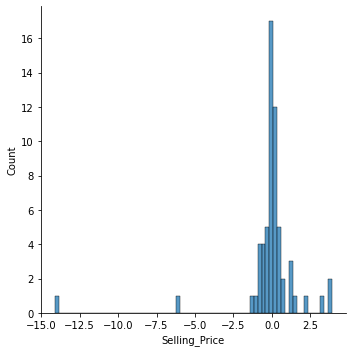

In [64]:
# Now we make predictions with the trained model
predictions = rf_random.predict(X_test)

# Find the distance between actual vs predicted
# since most of the distances are 0, that means our model is doing well
sns.displot(y_test-predictions)

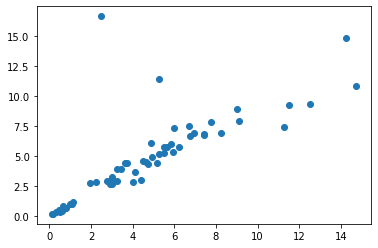

In [62]:
plt.scatter(y_test, predictions)

In [65]:
# Make a PICKLE FILE
import pickle

#open file
file = open('random_forest_regression_model.pkl', 'wb')

# Dump your model into that file
pickle.dump(rf_random, file)

file.close()

In [ ]:
# Now we make the requirements.txt file